<a href="https://colab.research.google.com/github/olasimboTobi/A-SQL-Model/blob/master/PCA_in_Crabs_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of Libraries

In [3]:
import pandas as pd
pd.set_option('display.precision',3)
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px



from sklearn import set_config
set_config(display="text") #the estimators will be displayed as text, and not as diagram (default is 'diagram')

import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [4]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


In [5]:
crabs_data = pd.read_csv("crabs.csv")
crabs_data.head()

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


In [6]:
crabs_data = crabs_data.rename(columns={'sp':'species', 'FL':'Frontal Lobe', 'RW':'Rear Width', 'CL':'Carapace Midline', 'CW':'Maximum Width', 'BD':'Body Length'})
crabs_data



,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Length
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
195,O,F,46,21.4,18.0,41.2,46.2,18.7
196,O,F,47,21.7,17.1,41.7,47.2,19.6
197,O,F,48,21.9,17.2,42.6,47.4,19.5
198,O,F,49,22.5,17.2,43.0,48.7,19.8


In [7]:
crabs_data['species'] = crabs_data['species'].map({'B':'Blue', 'O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male', 'F':'Female' })
crabs_data

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Length
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
195,Orange,Female,46,21.4,18.0,41.2,46.2,18.7
196,Orange,Female,47,21.7,17.1,41.7,47.2,19.6
197,Orange,Female,48,21.9,17.2,42.6,47.4,19.5
198,Orange,Female,49,22.5,17.2,43.0,48.7,19.8


In [8]:
crabs_data.describe(include='all')

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Length
count,200,200,200.000,200.000,200.000,200.000,200.000,200.000
unique,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Blue,Male,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,25.500,15.583,12.738,32.105,36.415,14.030
std,NaN,NaN,14.467,3.495,2.573,7.119,7.872,3.425
min,NaN,NaN,1.000,7.200,6.500,14.700,17.100,6.100
25%,NaN,NaN,13.000,12.900,11.000,27.275,31.500,11.400
50%,NaN,NaN,25.500,15.550,12.800,32.100,36.800,13.900
75%,NaN,NaN,38.000,18.050,14.300,37.225,42.000,16.600


####The **objective** is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).

###Exercise:
- Now Visualize the classes of the dataset.
- Improve the Visualization applying the **PCA** technique


In [9]:
crabs_data['class'] = crabs_data['species'] + crabs_data['sex']
crabs_data['class'].value_counts()

BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: class, dtype: int64

In [10]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Length,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


In [11]:
data_columns = ["Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width", "Body Length"]
crabs_data[data_columns].describe()

,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Length
count,200.000,200.000,200.000,200.000,200.000
mean,15.583,12.738,32.105,36.415,14.030
std,3.495,2.573,7.119,7.872,3.425
min,7.200,6.500,14.700,17.100,6.100
25%,12.900,11.000,27.275,31.500,11.400
50%,15.550,12.800,32.100,36.800,13.900
75%,18.050,14.300,37.225,42.000,16.600
max,23.100,20.200,47.600,54.600,21.600


###Boxplot of the relevant features

<Axes: >

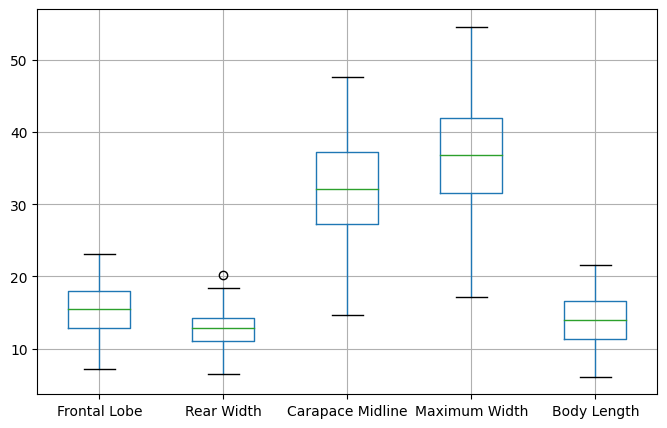

In [12]:
fig,ax = plt.subplots(figsize=(8,5))
crabs_data[data_columns].boxplot()

###Initial Vizualization of classes

<Axes: title={'center': 'Frontal Lobe'}, xlabel='class'>

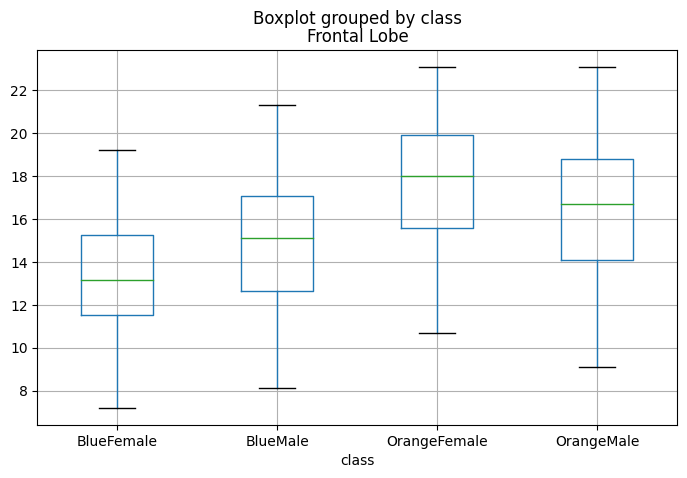

In [13]:
crabs_data.boxplot(column='Frontal Lobe', by='class', figsize=(8,5))

<Axes: title={'center': 'Rear Width'}, xlabel='class'>

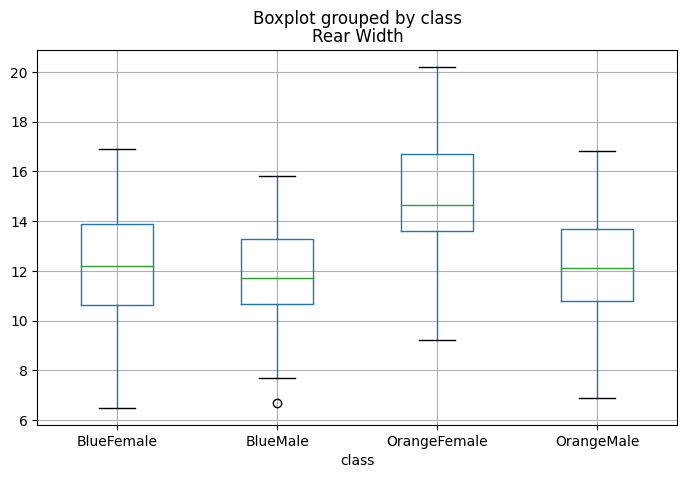

In [14]:
crabs_data.boxplot(column='Rear Width', by='class', figsize=(8,5))

<Axes: title={'center': 'Carapace Midline'}, xlabel='class'>

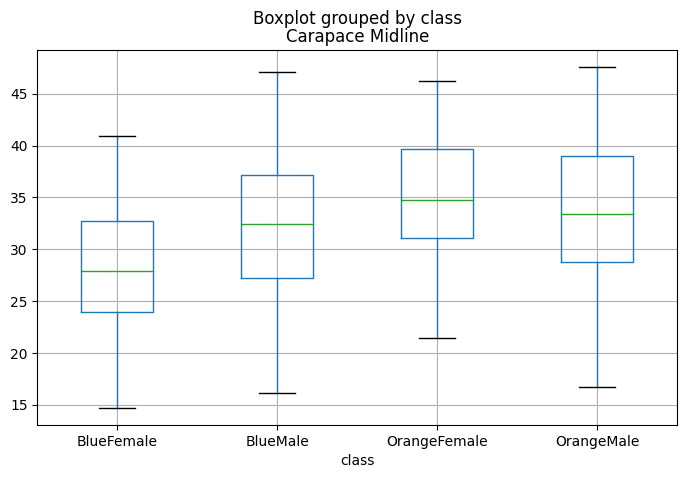

In [15]:
crabs_data.boxplot(column='Carapace Midline', by='class', figsize=(8,5))

<Axes: title={'center': 'Carapace Midline'}, xlabel='class'>

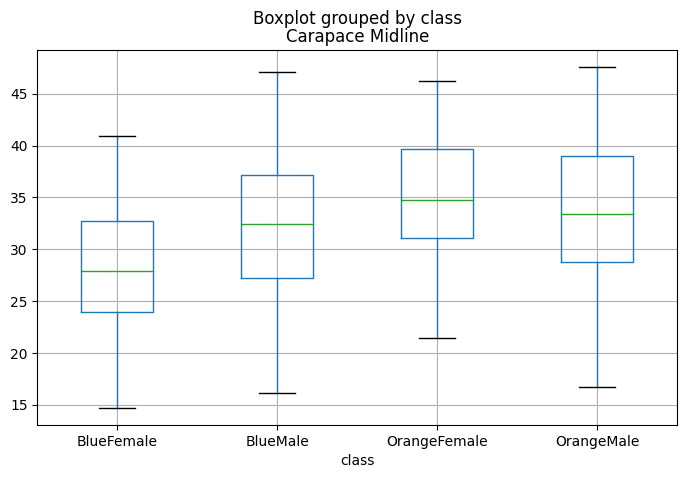

In [16]:
crabs_data.boxplot(column='Carapace Midline', by='class', figsize=(8,5))

<Axes: title={'center': 'Maximum Width'}, xlabel='class'>

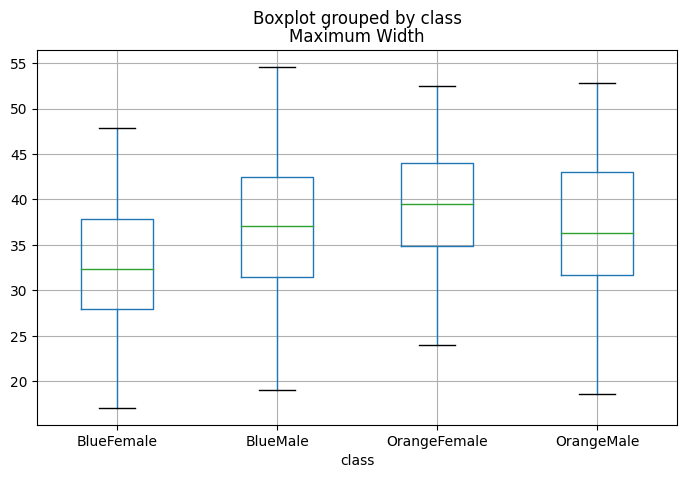

In [17]:
crabs_data.boxplot(column='Maximum Width', by='class', figsize=(8,5))

<Axes: title={'center': 'Body Length'}, xlabel='class'>

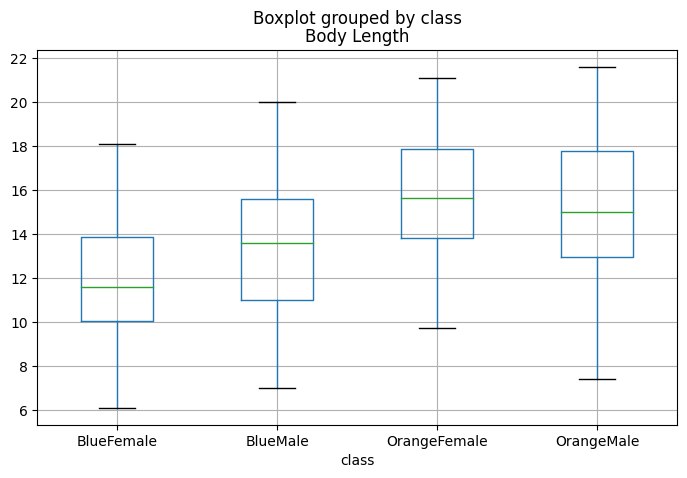

In [18]:
crabs_data.boxplot(column='Body Length', by='class', figsize=(8,5))

##HIstogram

array([[<Axes: title={'center': 'Frontal Lobe'}>,
        <Axes: title={'center': 'Rear Width'}>,
        <Axes: title={'center': 'Carapace Midline'}>,
        <Axes: title={'center': 'Maximum Width'}>,
        <Axes: title={'center': 'Body Length'}>, <Axes: >]], dtype=object)

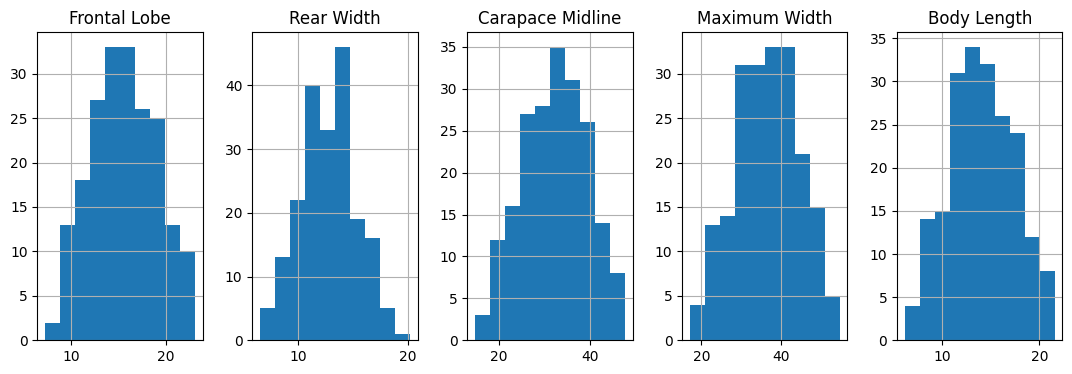

In [19]:
crabs_data[data_columns].hist(figsize=(16,4), layout=(1,6)) #layout = Tuple of (rows, columns) the histogram

<Axes: xlabel='Frontal Lobe', ylabel='Count'>

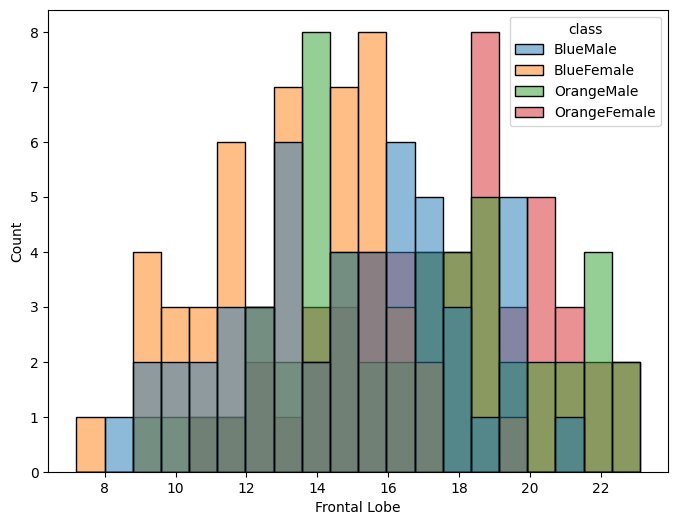

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x="Frontal Lobe", hue="class", bins=20)

<Axes: xlabel='Rear Width', ylabel='Count'>

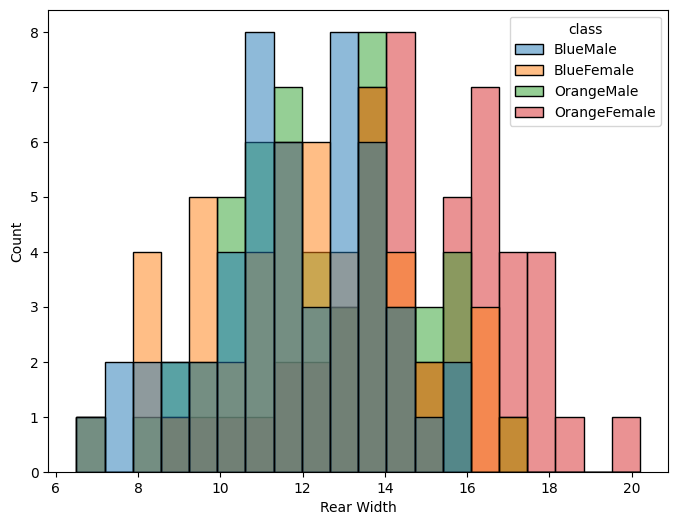

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x="Rear Width", hue="class", bins=20)

<Axes: xlabel='Carapace Midline', ylabel='Count'>

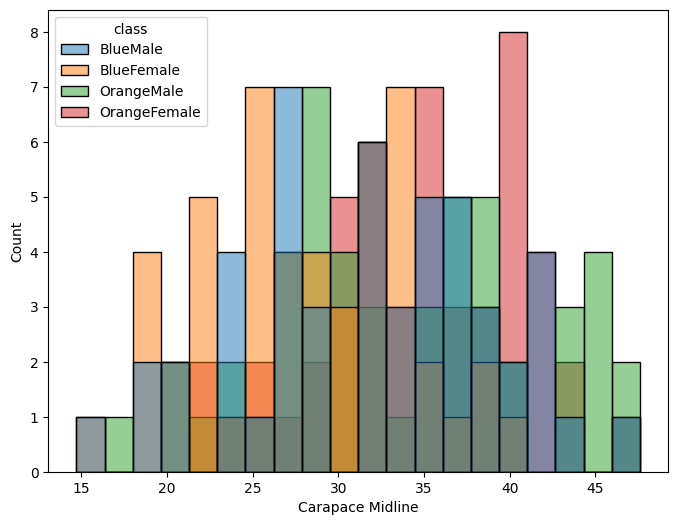

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x="Carapace Midline", hue="class", bins=20)

<Axes: xlabel='Maximum Width', ylabel='Count'>

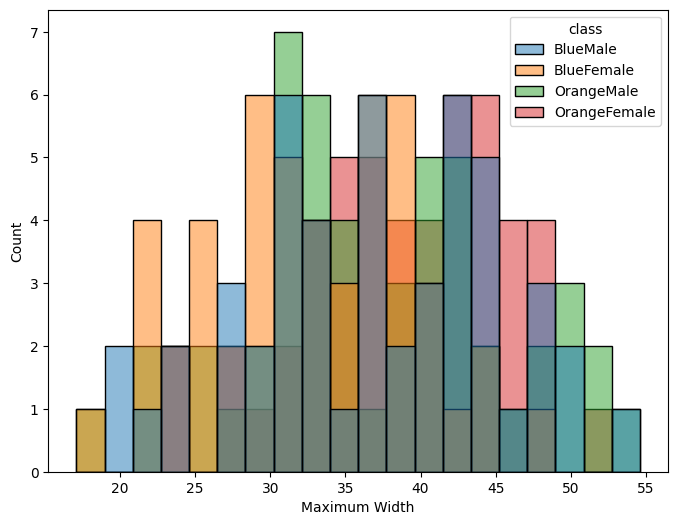

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x="Maximum Width", hue="class", bins=20)

<Axes: xlabel='Body Length', ylabel='Count'>

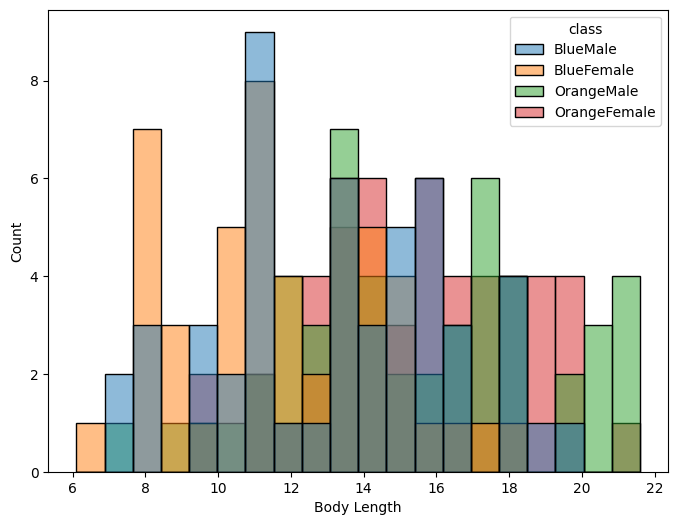

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data, x="Body Length", hue="class", bins=20)

###Pairplot: allows us to plot pairwise relationships between variables within a dataset

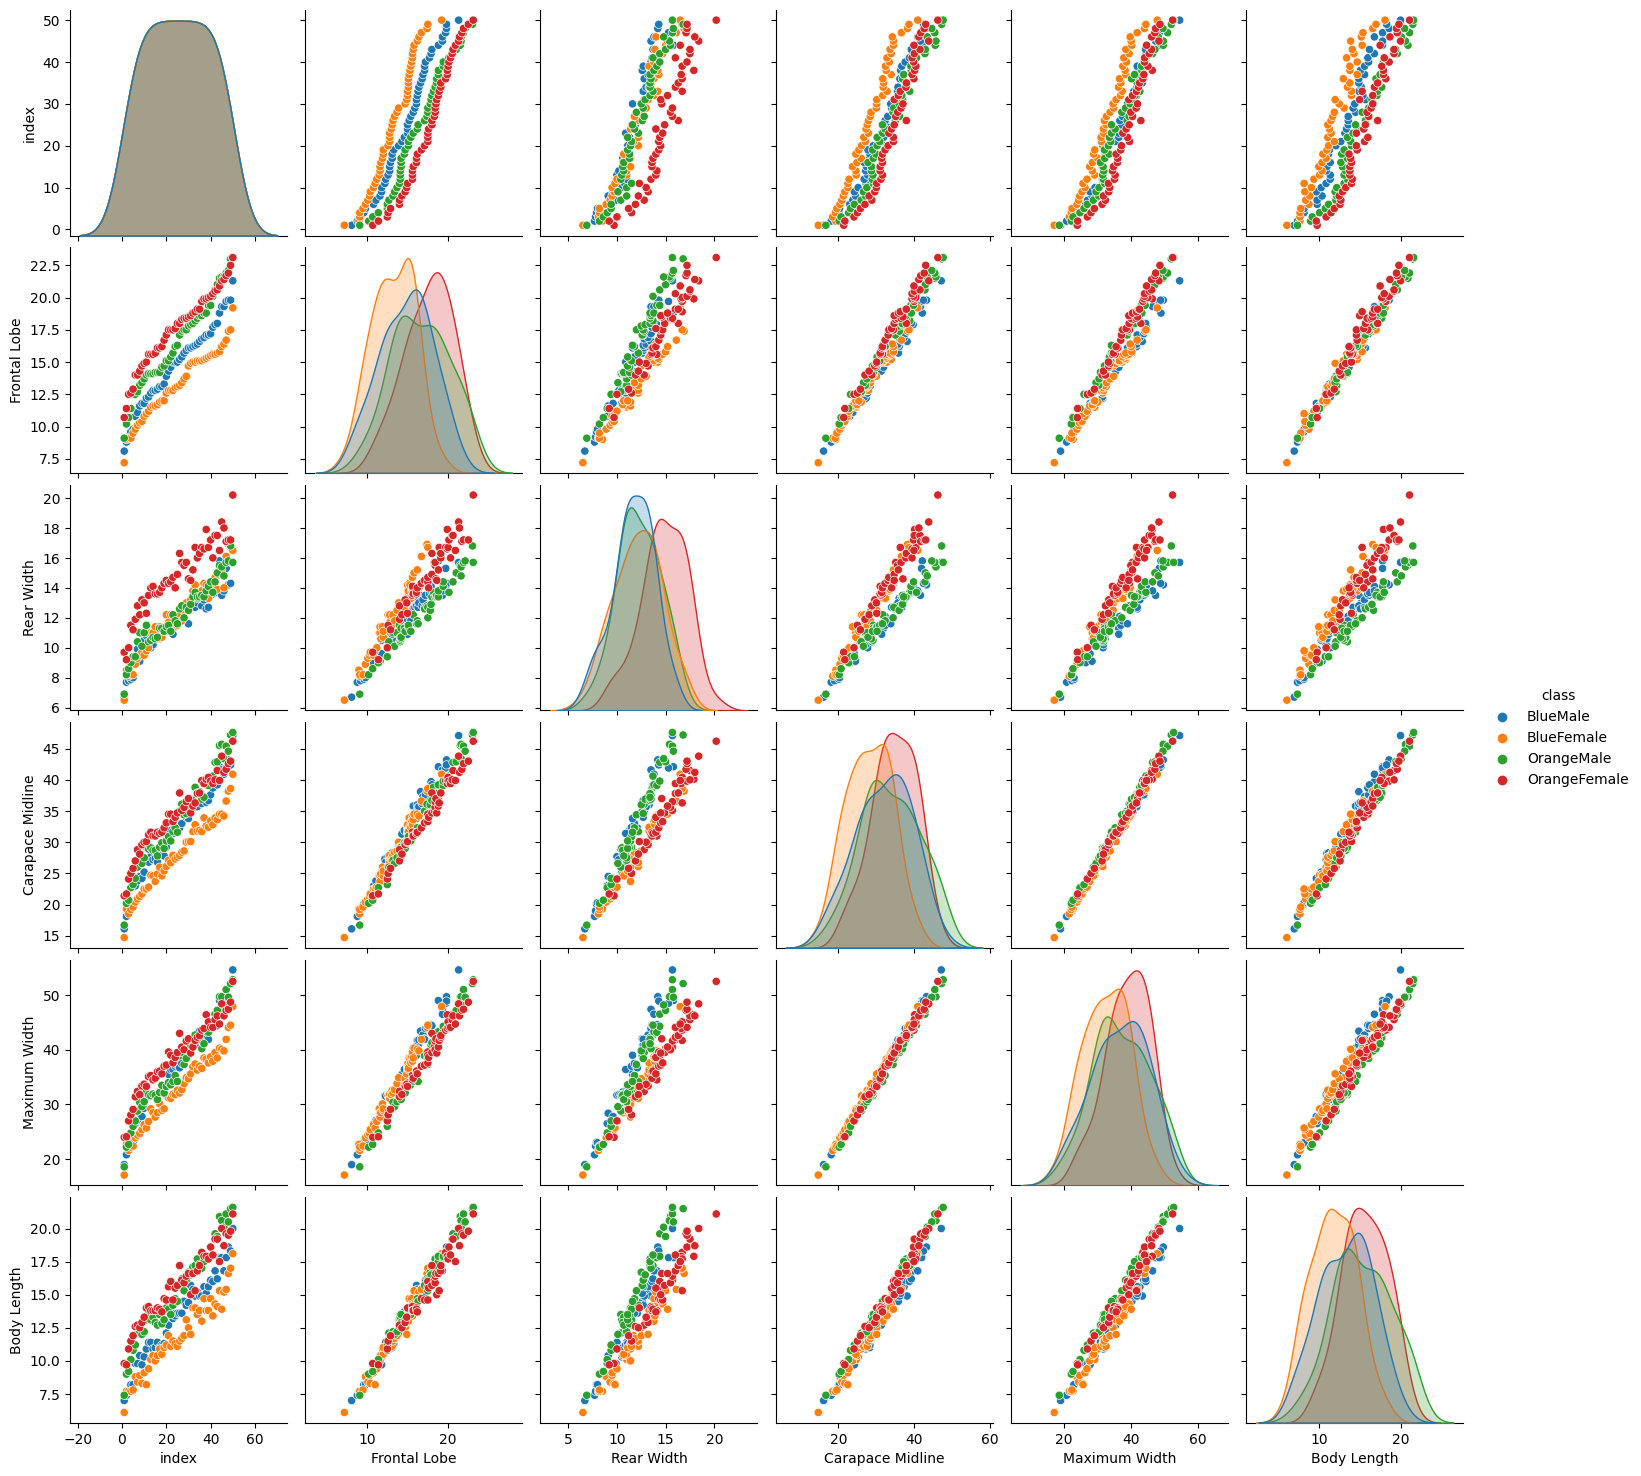

In [25]:
sns.pairplot(crabs_data, hue="class")

###Discusion for using **PCA**
The dimentionality of the data makes it difficult to manage and understand it.

Dimentionality reduction method allow

- Reduce unnecessary dimensions/noise
- Reduce computational cost of learning
- Visualize data in 2D/3D


##PCA
Now we are going to use **PCA** for a better vizualization of data.

Data must be standardized in orderto apply **PCA**. We will standardize it. This will change the data so that all variables have mean 0 and standard deviation 1.

In [26]:
crabs_standardized = crabs_data.copy()
crabs_standardized[data_columns] = StandardScaler().fit_transform(crabs_data[data_columns])
crabs_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550e+01,14.467,1.000,13.000,2.550e+01,38.000,50.000
Frontal Lobe,200.0,-7.105e-17,1.003,-2.404,-0.770,-9.465e-03,0.708,2.156
Rear Width,200.0,6.040e-16,1.003,-2.430,-0.677,2.396e-02,0.608,2.907
Carapace Midline,200.0,1.066e-16,1.003,-2.451,-0.680,-7.745e-04,0.721,2.182
Maximum Width,200.0,-4.974e-16,1.003,-2.460,-0.626,4.909e-02,0.711,2.316
Body Length,200.0,0.000e+00,1.003,-2.321,-0.770,-3.820e-02,0.752,2.216


###Let us proceed to use **PCA**.

The scikit-learn PCA method will return the explained variance ratio and all relevant PCA-related parameters.
You can use the explained variance ratio and the singular values to decide how many components to keep.

In [27]:
myPCA = PCA().fit(crabs_standardized[data_columns])

print(myPCA.explained_variance_ratio_) # returns a vector of the variance explained by each dimension.

print(myPCA.explained_variance_ratio_.cumsum()) # vector x such that x[i] return the cumultative variance explained by the first i + 1 dimension

[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
[0.95776696 0.988104   0.99743059 0.99965766 1.        ]


###Screeplot

The scree plot is used to determine the number of principal components to keep in a principal component analysis (PCA)

In [28]:
myPCA.singular_values_

array([30.94781021,  5.50790717,  3.05394742,  1.49233757,  0.58509446])

Text(0.5, 1.0, 'Screen Plot')

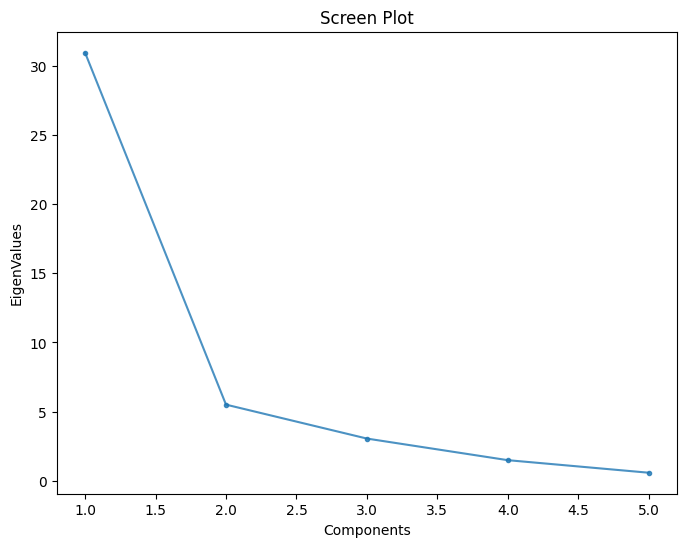

In [29]:
fig = plt.figure(figsize=(8,6))
# Scree Plot
plt.plot(range(1,len(myPCA.singular_values_)+ 1), myPCA.singular_values_, alpha=0.8, marker='.')
y_label = plt.ylabel('EigenValues')
x_label = plt.xlabel('Components')
plt.title('Screen Plot')

% of Explained Variance by Component

Text(0.5, 1.0, 'Percentage of variance explained by component')

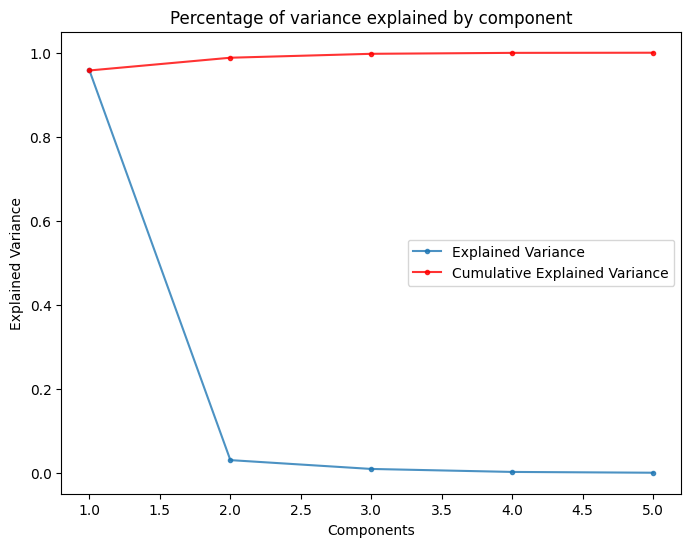

In [30]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.explained_variance_ratio_)+1), myPCA.explained_variance_ratio_, alpha=0.8, marker=".", label="Explained Variance")
y_label = plt.ylabel("Explained Variance")
x_label =plt.xlabel("Components")
plt.plot(range(1, len(myPCA.explained_variance_ratio_)+ 1), np.cumsum(myPCA.explained_variance_ratio_), c="r", alpha=0.8, marker=".", label="Cumulative Explained Variance")
plt.legend()
plt.title("Percentage of variance explained by component")

### We can also visualize the weights that the PCA assigns to each component

In [31]:
myPCA.components_

array([[-0.45204368, -0.42807736, -0.45319102, -0.45111272, -0.45113358],
       [-0.13758126,  0.89813071, -0.26823815, -0.18059588, -0.26432187],
       [-0.53076841,  0.01197915,  0.30968155,  0.65256956, -0.44316103],
       [ 0.69692337, -0.0837032 , -0.00144463,  0.08918782, -0.70663642],
       [ 0.09649156, -0.05441759, -0.79168267,  0.57452672,  0.17574331]])

<Axes: >

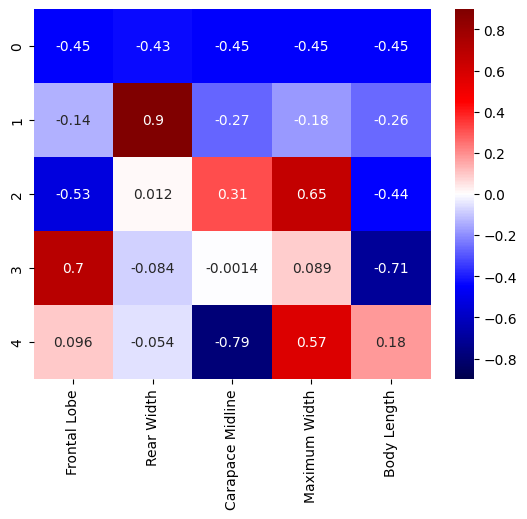

In [32]:
# fig = plt.figure(figsize=(8,6))
sns.heatmap(myPCA.components_, cmap="seismic", xticklabels = list(crabs_data.columns[3:-1]),
            vmin=-np.max(np.abs(myPCA.components_)), vmax=np.max(np.abs(np.abs(myPCA.components_))),
            annot=True)

In [33]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Length,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


### PCA: Transformation and Vizualization

Now we can transform our dataset using the "trained" PCA.

Generally, for vizualization,2 or 3 components are chosen.

### We will choose 3 Components

In [34]:
crabs_standardized[data_columns].head()

,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Length
0,-2.146,-2.352,-2.254,-2.218,-2.058
1,-1.945,-1.963,-1.972,-1.989,-1.941
2,-1.831,-1.924,-1.846,-1.785,-1.853
3,-1.716,-1.885,-1.691,-1.696,-1.707
4,-1.659,-1.846,-1.662,-1.708,-1.707


In [42]:
transformed = myPCA.transform(crabs_standardized[data_columns])
crabs_standardized[['PC1','PC2','PC3']] = transformed[:, :3]


In [36]:
crabs_standardized.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Length,class,PC1,PC2,PC3
0,Blue,Male,1,-2.146,-2.352,-2.254,-2.218,-2.058,BlueMale,4.928,-0.268,-0.122
1,Blue,Male,2,-1.945,-1.963,-1.972,-1.989,-1.941,BlueMale,4.386,-0.094,-0.039
2,Blue,Male,3,-1.831,-1.924,-1.846,-1.785,-1.853,BlueMale,4.129,-0.169,0.034
3,Blue,Male,4,-1.716,-1.885,-1.691,-1.696,-1.707,BlueMale,3.884,-0.246,0.015
4,Blue,Male,5,-1.659,-1.846,-1.662,-1.708,-1.707,BlueMale,3.834,-0.224,-0.015


###Vizualize the first 2 Components of the PCA

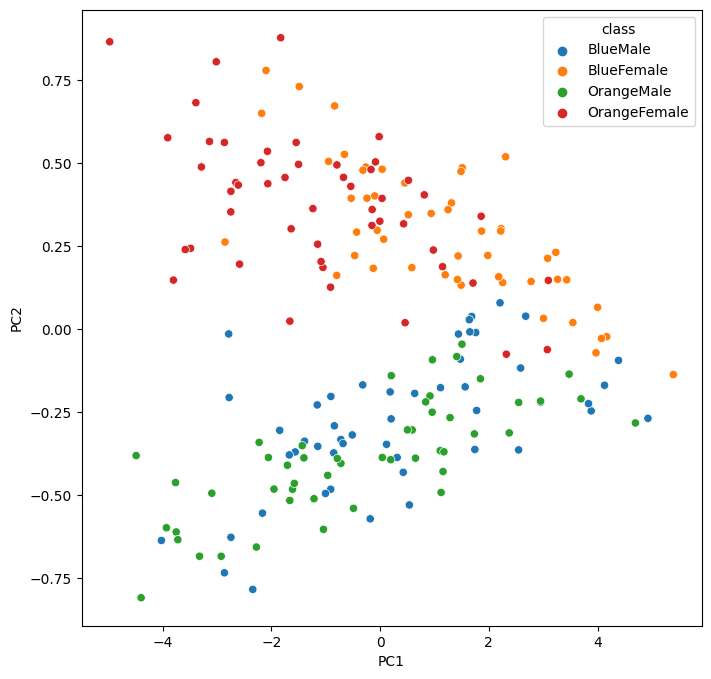

In [37]:
fig=plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1',y='PC2', hue="class", data=crabs_standardized)

###We can see that the PCA does a good job with this data.

### Vizualize the first 3 Components of the PCA

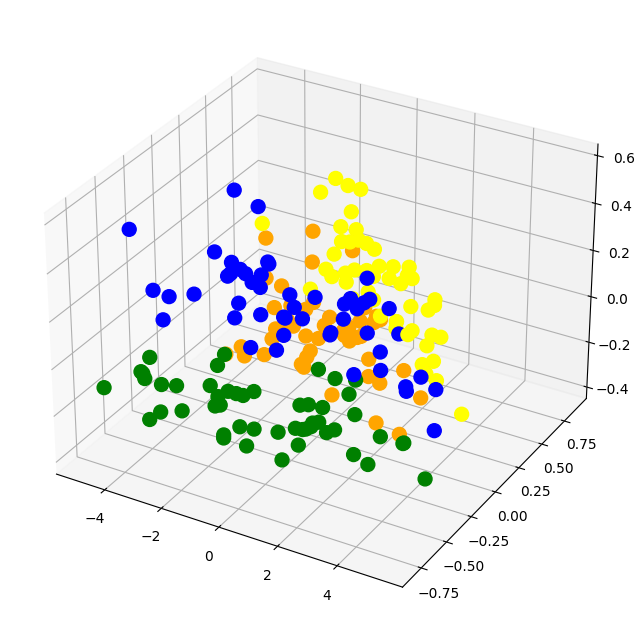

In [38]:
colors_crabs = {'BlueFemale':'yellow', 'BlueMale':'blue', 'OrangeFemale':'orange', 'OrangeMale':'green'}

fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

plt.scatter(crabs_standardized.PC1,crabs_standardized.PC2,zs=crabs_standardized.PC3,
            depthshade=False, c=crabs_data['class'].apply(lambda x: colors_crabs[x]),s=100)

In [39]:
fig = px.scatter_3d(crabs_standardized, x='PC1',y='PC2',z='PC3', color='class')
fig.show()